In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
from pandas import DataFrame
from matplotlib.pyplot import pie
import matplotlib as mpl
import locale

url = 'https://raw.githubusercontent.com/wimurad1981/MRP/master/20100003.csv'
NAICS_Wholesale_Data = pd.read_csv(url, header = None, names = ['REF_DATE', 'GEO', 'DGUID', 'Sales, price and volume', 'North American Industry Classification System (NAICS)', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'YEAR'])

#from google.colab import files
#uploaded = files.upload()
#import io
#NAICS_Wholesale_Data = pd.read_csv(io.BytesIO(uploaded['20100003.csv']), header = None, names = ['REF_DATE', 'GEO', 'DGUID', 'Sales, price and volume', 'North American Industry Classification System (NAICS)', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'YEAR'])

NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop(index = NAICS_Wholesale_Data.index[0])
NAICS_Wholesale_Data.shape

(5100, 17)

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
NAICS_Wholesale_Data = NAICS_Wholesale_Data.reset_index()
df=pd.DataFrame(NAICS_Wholesale_Data)
NAICS_Wholesale_Data = df.fillna(0)
NAICS_Wholesale_Data['VALUE'] = NAICS_Wholesale_Data['VALUE'].astype(float)
#df['VALUE'] = df['VALUE'].map('{:,.2f}'.format)
df

,index,REF_DATE,GEO,DGUID,"Sales, price and volume",North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,1,2004-01,Canada,2016A000011124,Wholesale sales in current prices,Wholesale trade [41],Dollars,81,millions,6,v120586537,1.1.1,35239,A,NaN,NaN,0,2004
1,2,2004-01,Canada,2016A000011124,"Wholesale sales, chained Fisher price index (2...",Wholesale trade [41],Dollars,81,millions,6,v120586538,1.2.1,39123,A,NaN,NaN,0,2004
2,3,2004-01,Canada,2016A000011124,Wholesale sales at 2012 prices (chained Fisher...,Wholesale trade [41],Index,160,units,0,v120586539,1.3.1,90.1,A,NaN,NaN,1,2004
3,4,2004-01,Canada,2016A000011124,Wholesale sales at 2012 constant prices,Wholesale trade [41],Dollars,81,millions,6,v120586540,1.4.1,39252,A,NaN,NaN,0,2004
4,5,2004-02,Canada,2016A000011124,Wholesale sales in current prices,Wholesale trade [41],Dollars,81,millions,6,v120586537,1.1.1,35410,A,NaN,NaN,0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,5096,2020-03,Canada,2016A000011124,Wholesale sales at 2012 constant prices,Recyclable material merchant wholesalers [4181],Dollars,81,millions,6,v120848135,1.4.29,706,D,NaN,NaN,0,2020
5096,5097,2020-03,Canada,2016A000011124,Wholesale sales at 2012 constant prices,"Paper, paper product and disposable plastic pr...",Dollars,81,millions,6,v120848136,1.4.30,843,B,NaN,NaN,0,2020
5097,5098,2020-03,Canada,2016A000011124,Wholesale sales at 2012 constant prices,Agricultural supplies merchant wholesalers [4183],Dollars,81,millions,6,v120848137,1.4.31,2755,B,NaN,NaN,0,2020
5098,5099,2020-03,Canada,2016A000011124,Wholesale sales at 2012 constant prices,Chemical (except agricultural) and allied prod...,Dollars,81,millions,6,v120848138,1.4.32,1270,B,NaN,NaN,0,2020


In [46]:
df_NAICS = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
df_NAICS['VALUE'] = df_NAICS['VALUE'].astype(float)
df_4131 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Food merchant wholesalers [4131]') & (df_NAICS['YEAR'] != '2020')]  
df_4132 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Beverage merchant wholesalers [4132]') & (df_NAICS['YEAR'] != '2020')]
df_4133 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Cigarette and tobacco product merchant wholesalers [4133]') & (df_NAICS['YEAR'] != '2020')]
df_4141 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Textile, clothing and footwear merchant wholesalers [4141]') & (df_NAICS['YEAR'] != '2020')]
df_4142 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Home entertainment equipment and household appliance merchant wholesalers [4142]') & (df_NAICS['YEAR'] != '2020')]
df_4143 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Home furnishings merchant wholesalers [4143]') & (df_NAICS['YEAR'] != '2020')]
df_4144 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Personal goods merchant wholesalers [4144]') & (df_NAICS['YEAR'] != '2020')]
df_4145 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Pharmaceuticals, toiletries, cosmetics and sundries merchant wholesalers [4145]') & (df_NAICS['YEAR'] != '2020')]
df_4151 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Motor vehicle merchant wholesalers [4151]') & (df_NAICS['YEAR'] != '2020')]
df_4152 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'New motor vehicle parts and accessories merchant wholesalers [4152]') & (df_NAICS['YEAR'] != '2020')]
df_4153 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Used motor vehicle parts and accessories merchant wholesalers [4153]') & (df_NAICS['YEAR'] != '2020')]
df_4161 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Electrical, plumbing, heating and air-conditioning equipment and supplies merchant wholesalers [4161]') & (df_NAICS['YEAR'] != '2020')]
df_4162 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Metal service centres [4162]') & (df_NAICS['YEAR'] != '2020')]
df_4163 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Lumber, millwork, hardware and other building supplies merchant wholesalers [4163]') & (df_NAICS['YEAR'] != '2020')]
df_4171 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Farm, lawn and garden machinery and equipment merchant wholesalers [4171]') & (df_NAICS['YEAR'] != '2020')]
df_4172 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Construction, forestry, mining, and industrial machinery, equipment and supplies merchant wholesalers [4172]') & (df_NAICS['YEAR'] != '2020')]
df_4173 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Computer and communications equipment and supplies merchant wholesalers [4173]') & (df_NAICS['YEAR'] != '2020')]
df_4179 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Other machinery, equipment and supplies merchant wholesalers [4179]') & (df_NAICS['YEAR'] != '2020')]
df_4181 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Recyclable material merchant wholesalers [4181]') & (df_NAICS['YEAR'] != '2020')]
df_4182 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Paper, paper product and disposable plastic product merchant wholesalers [4182]') & (df_NAICS['YEAR'] != '2020')]
df_4183 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Agricultural supplies merchant wholesalers [4183]') & (df_NAICS['YEAR'] != '2020')]
df_4184 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Chemical (except agricultural) and allied product merchant wholesalers [4184]') & (df_NAICS['YEAR'] != '2020')]
df_4189 = df_NAICS.loc[(df_NAICS['North American Industry Classification System (NAICS)'] == 'Other miscellaneous merchant wholesalers [4189]') & (df_NAICS['YEAR'] != '2020')]

df_4131_N = df_4131['VALUE'].to_numpy()
df_4132_N = df_4132['VALUE'].to_numpy()
df_4133_N = df_4133['VALUE'].to_numpy()
df_4141_N = df_4141['VALUE'].to_numpy()
df_4142_N = df_4142['VALUE'].to_numpy()
df_4143_N = df_4143['VALUE'].to_numpy()
df_4144_N = df_4144['VALUE'].to_numpy()
df_4145_N = df_4145['VALUE'].to_numpy()
df_4151_N = df_4151['VALUE'].to_numpy()
df_4152_N = df_4152['VALUE'].to_numpy()
df_4153_N = df_4153['VALUE'].to_numpy()
df_4161_N = df_4161['VALUE'].to_numpy()
df_4162_N = df_4162['VALUE'].to_numpy()
df_4163_N = df_4163['VALUE'].to_numpy()
df_4171_N = df_4171['VALUE'].to_numpy()
df_4172_N = df_4172['VALUE'].to_numpy()
df_4173_N = df_4173['VALUE'].to_numpy()
df_4179_N = df_4179['VALUE'].to_numpy()
df_4181_N = df_4181['VALUE'].to_numpy()
df_4182_N = df_4182['VALUE'].to_numpy()
df_4183_N = df_4183['VALUE'].to_numpy()
df_4184_N = df_4184['VALUE'].to_numpy()
df_4189_N = df_4189['VALUE'].to_numpy()

df_4131_N

array([7962., 7709., 7793., 7666., 7690., 7847., 7669., 7761., 7887.,
       7697., 7907., 7978., 7934., 8186., 8048., 8141., 8088., 8082.,
       8257., 8022., 8122., 8145., 8255., 8135., 8159., 8124., 8149.,
       8327., 8262., 8307., 8449., 8332., 8333., 8385., 8370., 8458.,
       8404., 8369., 8467., 8566., 8525., 8504., 8411., 8546., 8622.,
       8597., 8458., 8438., 8594., 8565., 8509., 8429., 8634., 8371.,
       8561., 8576., 8450., 8789., 8727., 8852., 8550., 8587., 8697.,
       8616., 8553., 8681., 8467., 8604., 8639., 8474., 8524., 8393.,
       8453., 8613., 8504., 8309., 8427., 8531., 8413., 8368., 8531.,
       8341., 8499., 8620., 8548., 8376., 8362., 8670., 8929., 8921.,
       9012., 8943., 8979., 9079., 8919., 9047., 8780., 8944., 9103.,
       8903., 9011., 8845., 8807., 8842., 8679., 8779., 8889., 8838.,
       9054., 9096., 8898., 9224., 8976., 8793., 9055., 9058., 8962.,
       9028., 8959., 8924., 9072., 8962., 9011., 9066., 8854., 9037.,
       9084., 8912.,

In [47]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [48]:
def ARIMA_Wholesale(df_NAICS_N, p, d, q):
	X = df_NAICS_N
	size = int(len(X) * 0.82)
	
	train, test = X[0:size], X[size:len(X)]
	train_predictions = train
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		model = ARIMA(history, order = (p,d,q))
		model_fit = model.fit(disp=0)
		output = model_fit.forecast()
		prediction_step = output[0]
		predictions.append(prediction_step)
		train_predictions = np.append(train_predictions, prediction_step)
		observation_step = test[i]
		history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, observation_step))
	A_RMSE = np.sqrt(mean_squared_error(test, predictions))
	A_MAE = mean_absolute_error(test, predictions)
	A_MAPE = mean_absolute_percentage_error(test, predictions)
	
	##print(train)
	##print(predictions)
	fig, ay = plt.subplots(figsize=(8, 5))
	labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
	plt.title('Wholesale sales prediction (ARIMA)', loc = "center", fontsize = 14)
	pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	pyplot.plot(X, color='blue')
	pyplot.xticks(np.arange(0,131,12), labels = labels_Year)
	#ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	
  
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
	plt.xlim(0,131)
	
	plt.xlabel("TIME")
	plt.ylabel("VALUE (MILLION DOLLAR)")
	
	##ay.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

	plot_acf(test, lags = 20, zero = False)
	
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	plot_pacf(test, lags = 20, zero = False)
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	plt.show()
	
	print(model_fit.summary())
	residuals = DataFrame(model_fit.resid)
	residuals.plot(kind='kde')
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
 	##residuals.plot()
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	print (residuals.describe())
 	 
	return (A_RMSE, A_MAE, A_MAPE)

In [49]:
def ARIMA_Wholesale_CV(df_NAICS_N, p, d, q):

  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
	#train, test = X[0:size], X[size:len(X)]
	#train_predictions = train
  train_predictions = train
	#history = [x for x in train]
  history = [x for x in train]
	#predictions = list()
  predictions = list()

	
  for i in range(len(test)):
	  model = ARIMA(history, order = (p,d,q))
	  model_fit = model.fit(disp=0)
	  output = model_fit.forecast()
	  prediction_step = output[0]
	  predictions.append(prediction_step)
	  train_predictions = np.append(train_predictions, prediction_step)
	  observation_step = test[i]
	  history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
  A_RMSE = np.sqrt(mean_squared_error(test, predictions))
  A_MAE = mean_absolute_error(test, predictions)
  A_MAPE = mean_absolute_percentage_error(test, predictions)
	
	##print(train)
	##print(predictions)
  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.title('Wholesale sales prediction (ARIMA)', loc = "center", fontsize = 14)
  pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
  pyplot.xticks(np.arange(0,107,12), labels = labels_Year)
  
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
  plt.xlim(0,107)
	
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plot_acf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plot_pacf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
 	
	##ay.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

  plt.show()
	
  print(model_fit.summary())
  residuals = DataFrame(model_fit.resid)
  residuals.plot(kind='kde')
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
 	##residuals.plot()
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  print (residuals.describe())
 	
  return (A_RMSE, A_MAE, A_MAPE)

In [50]:
def SARIMAX_Wholesale(df_NAICS_N, p, d, q):
	X = df_NAICS_N
	size = int(len(X) * 0.82)
	train, test = X[0:size], X[size:len(X)]
	train_predictions = train
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		model = SARIMAX(history, order = (p, d, q))
		model_fit = model.fit(disp=0)
		output = model_fit.forecast()
		prediction_step = output[0]
		predictions.append(prediction_step)
		train_predictions = np.append(train_predictions, prediction_step)
		observation_step = test[i]
		history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
	S_RMSE = np.sqrt(mean_squared_error(test, predictions))
	S_MAE = mean_absolute_error(test, predictions)
	S_MAPE = mean_absolute_percentage_error(test, predictions)
	
	fig, ay = plt.subplots(figsize=(8, 5))
	labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
	plt.title('Wholesale sales prediction (SARIMAX)', loc = "center", fontsize = 14)
	pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
	ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
	pyplot.plot(X, color='blue')
	pyplot.xticks(np.arange(0,131,12), labels = labels_Year)
  
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
	plt.xlim(0,131)
	plt.xlabel("TIME")
	
	plt.xlabel("TIME")
	plt.ylabel("VALUE (MILLION DOLLAR)")
 	
	plot_acf(test, lags = 20, zero = False) 
 	
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
 
	plot_pacf(test, lags = 20, zero = False)
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
 
	plt.show()

	print(model_fit.summary())
	residuals = DataFrame(model_fit.resid)
	residuals.plot(kind='kde')
	#residuals.plot()
	plt.grid(color='grey', linestyle='-', linewidth=0.5)
	print (residuals.describe())
	
	return (S_RMSE, S_MAE, S_MAPE)

In [51]:
def SARIMAX_Wholesale_CV(df_NAICS_N, p, d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  for i in range(len(test)):
	  model = SARIMAX(history, order = (p, d, q))
	  model_fit = model.fit(disp=0)
	  output = model_fit.forecast()
	  prediction_step = output[0]
	  predictions.append(prediction_step)
	  train_predictions = np.append(train_predictions, prediction_step)
	  observation_step = test[i]
	  history.append(observation_step)
		##print('predicted=%f, expected=%f' % (yhat, obs))
  S_RMSE = np.sqrt(mean_squared_error(test, predictions))
  S_MAE = mean_absolute_error(test, predictions)
  S_MAPE = mean_absolute_percentage_error(test, predictions)
	
  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.title('Wholesale sales prediction (SARIMAX)', loc = "center", fontsize = 14)
  pyplot.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
  pyplot.xticks(np.arange(0,107,12), labels = labels_Year)
  
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
	##plt.ylim(6000,9500)
  plt.xlim(0,107)
  ##plt.xlabel("TIME")
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
 	
  plot_acf(test, lags = 20, zero = False) 
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plot_pacf(test, lags = 20, zero = False)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.show()

  print(model_fit.summary())
  residuals = DataFrame(model_fit.resid)
  residuals.plot(kind='kde')
  #residuals.plot()
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  print (residuals.describe())
	
  return (S_RMSE, S_MAE, S_MAPE)

In [52]:
def SD_Wholesale(df_NAICS_N, p , d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.82)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  
  try:
    result = seasonal_decompose(test, model = 'multiplicative', extrapolate_trend = 'freq', freq = q)
  except:
    pass
  
  prediction_step = result.trend
  predictions.append(prediction_step)
  train_predictions = np.append(train_predictions, prediction_step)

  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
  plt.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
	
  pyplot.xticks(np.arange(0, 131, 12), labels = labels_Year)
  
  ##print(result.trend)
  ##print(result.observed)
  df_4131_S = pd.DataFrame(columns=['Seasonal', 'Trend', 'Residual', 'Observed'])
  df_4131_S['Seasonal'] = result.trend
  df_4131_S['Trend'] = result.trend
  df_4131_S['Residual'] = result.resid
  df_4131_S['Observed'] = result.observed
  
  ##print(df_4131_S)
  ##print(result.observed)
  SD_RMSE = np.sqrt(mean_squared_error(result.observed, result.trend))
  SD_MAE = mean_absolute_error(result.observed, result.trend)
  SD_MAPE = mean_absolute_percentage_error(result.observed, result.trend)
  
  plt.title('Wholesale sales prediction (Seasonal Decomposition)', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.xlim(0,131)
  #result.plot()
  
  fig1, ay = plt.subplots(figsize=(8, 5))
  plt.title('Seasonal Decomposition - Residual Plot', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("RESIDUAL ERROR")
  residual = result.resid
  labels_Year = ['2018-01','2018-03','2018-06','2018-09','2018-12','2019-03','2019-06','2019-09','2019-12']
  plt.plot(residual, color='blue', linewidth = 2)
  pyplot.xticks(np.arange(0, 24, 3), labels = labels_Year)
  plt.xlim(0,24)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  #ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.show()
  
  return (SD_RMSE, SD_MAE, SD_MAPE)

In [53]:
def SD_Wholesale_CV(df_NAICS_N, p , d, q):
  X = df_NAICS_N
  size = int(len(X) * 0.7777)
  train, test = X[0:size], X[size:len(X)]
  train_predictions = train
  history = [x for x in train]
  predictions = list()
  
  try:
    result = seasonal_decompose(test, model = 'multiplicative', extrapolate_trend = 'freq', freq = q)
  except:
    pass
  
  prediction_step = result.trend
  predictions.append(prediction_step)
  train_predictions = np.append(train_predictions, prediction_step)

  fig, ay = plt.subplots(figsize=(8, 5))
  labels_Year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']
  plt.plot(train_predictions, color='mediumspringgreen', linewidth = 2)
  ay.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  pyplot.plot(X, color='blue')
	
  pyplot.xticks(np.arange(0, 107, 12), labels = labels_Year)
  
  ##print(result.trend)
  ##print(result.observed)
  df_4131_S = pd.DataFrame(columns=['Seasonal', 'Trend', 'Residual', 'Observed'])
  df_4131_S['Seasonal'] = result.trend
  df_4131_S['Trend'] = result.trend
  df_4131_S['Residual'] = result.resid
  df_4131_S['Observed'] = result.observed
  
  ##print(df_4131_S)
  ##print(result.observed)
  SD_RMSE = np.sqrt(mean_squared_error(result.observed, result.trend))
  SD_MAE = mean_absolute_error(result.observed, result.trend)
  SD_MAPE = mean_absolute_percentage_error(result.observed, result.trend)
  
  plt.title('Wholesale sales prediction (Seasonal Decomposition)', loc = "center", fontsize = 16)
  plt.xlabel("TIME")
  plt.ylabel("VALUE (MILLION DOLLAR)")
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  plt.xlim(0,107)
  
  fig1, ay = plt.subplots(figsize=(8, 5))
  residual = result.resid
  labels_Year = ['2016-01','2016-03','2016-06','2016-09','2016-12','2017-03','2017-06','2017-09','2017-12']
  plt.plot(residual, color='blue', linewidth = 2)
  pyplot.xticks(np.arange(0, 24, 3), labels = labels_Year)
  plt.xlim(0,24)
  plt.grid(color='grey', linestyle='-', linewidth=0.5)
  pyplot.show()
  
  return (SD_RMSE, SD_MAE, SD_MAPE)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import  drive
drive.mount('/drive')

df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4131_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4131_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4131_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Food merchant wholesalers [4131]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4132_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4132_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4132_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Beverage merchant wholesalers [4132]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4133_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4133_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4133_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Cigarette and tobacco product merchant wholesalers [4133]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4141_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4141_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4141_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Textile, clothing and footwear merchant wholesalers [4141]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4142_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4142_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4142_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Home entertainment equipment and household appliance merchant wholesalers [4142]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4143_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4143_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4143_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Home furnishings merchant wholesalers [4143]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4144_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4144_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4144_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Personal goods merchant wholesalers [4144]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4145_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4145_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4145_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Pharmaceuticals, toiletries, cosmetics and sundries merchant wholesalers [4145]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4151_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4151_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4151_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Motor vehicle merchant wholesalers [4151]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4152_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4152_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4152_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'New motor vehicle parts and accessories merchant wholesalers [4152]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4153_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4153_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4153_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Used motor vehicle parts and accessories merchant wholesalers [4153]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4161_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4161_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4161_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Electrical, plumbing, heating and air-conditioning equipment and supplies merchant wholesalers [4161]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4162_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4162_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4162_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Metal service centres [4162]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4163_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4163_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4163_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Lumber, millwork, hardware and other building supplies merchant wholesalers [4163]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4171_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4171_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4171_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Farm, lawn and garden machinery and equipment merchant wholesalers [4171]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4172_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4172_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4172_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Construction, forestry, mining, and industrial machinery, equipment and supplies merchant wholesalers [4172]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4173_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4173_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4173_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Computer and communications equipment and supplies merchant wholesalers [4173]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4179_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4179_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4179_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Other machinery, equipment and supplies merchant wholesalers [4179]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4181_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4181_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4181_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Recyclable material merchant wholesalers [4181]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4182_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4182_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4182_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Paper, paper product and disposable plastic product merchant wholesalers [4182]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4183_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4183_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4183_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Agricultural supplies merchant wholesalers [4183]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4184_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4184_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4184_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Chemical (except agricultural) and allied product merchant wholesalers [4184]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_4189_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_4189_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_4189_N, 0, 0, 12)
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Other miscellaneous merchant wholesalers [4189]', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)

df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_Industry_All.csv')

df_Error_Table
#print('Test RMSE: %.3f' % A_RMSE)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
NAICS_Wholesale_Data = NAICS_Wholesale_Data.set_index("North American Industry Classification System (NAICS)")
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Wholesale trade [41]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Farm product merchant wholesalers [411]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Food, beverage and tobacco merchant wholesalers [413]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Personal and household goods merchant wholesalers [414]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Motor vehicle and motor vehicle parts and accessories merchant wholesalers  [415]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Building material and supplies merchant wholesalers [416]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Machinery, equipment and supplies merchant wholesalers [417]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Miscellaneous merchant wholesalers [418]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Pharmaceuticals and pharmacy supplies merchant wholesalers [41451]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.drop("Toiletries, cosmetics and sundries merchant wholesalers [41452]", axis=0)
NAICS_Wholesale_Data = NAICS_Wholesale_Data.reset_index()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


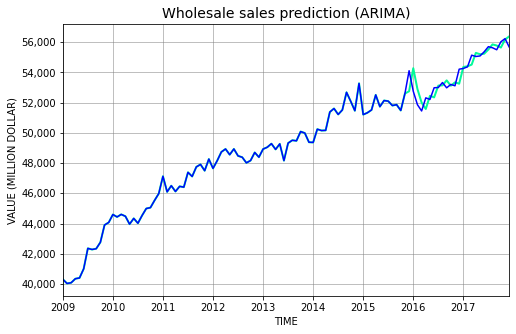

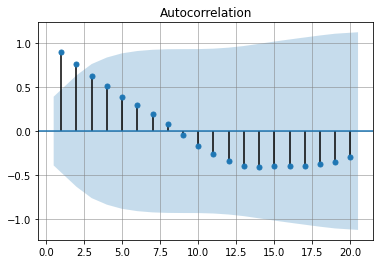

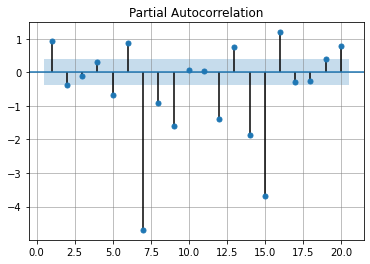

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  106
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -829.538
Method:                           css   S.D. of innovations            606.008
Date:                Wed, 29 Jul 2020   AIC                           1663.076
Time:                        04:53:52   BIC                           1668.403
Sample:                             1   HQIC                          1665.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.2453     58.861      2.553      0.012      34.880     265.610
                  0
count  1.060000e+02
mean   1.581963e-14
std    6.088874e+02
min   -2.217245e+03
25%   -3.029953e+02
50%   -1.27

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


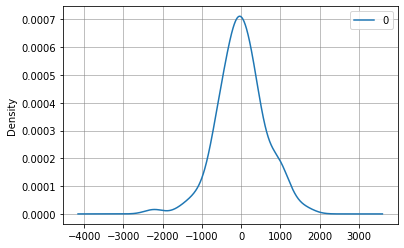

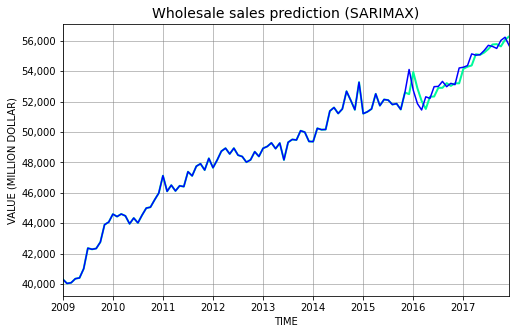

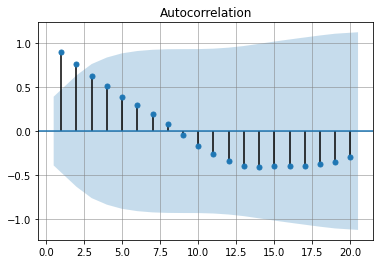

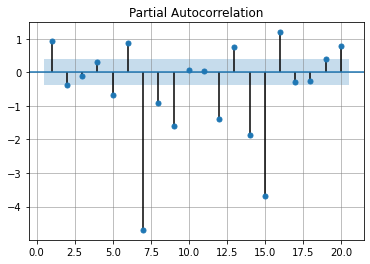

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(6, 1, 1)   Log Likelihood                -825.235
Date:                Wed, 29 Jul 2020   AIC                           1666.471
Time:                        04:53:58   BIC                           1687.778
Sample:                             0   HQIC                          1675.107
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6312      0.170      3.711      0.000       0.298       0.965
ar.L2          0.0497      0.073      0.684      0.494      -0.093       0.192
ar.L3          0.0351      0.094      0.373      0.7

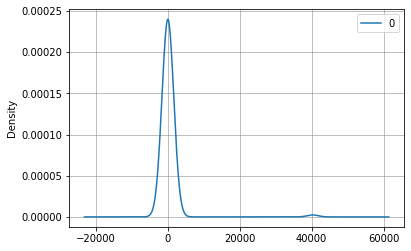

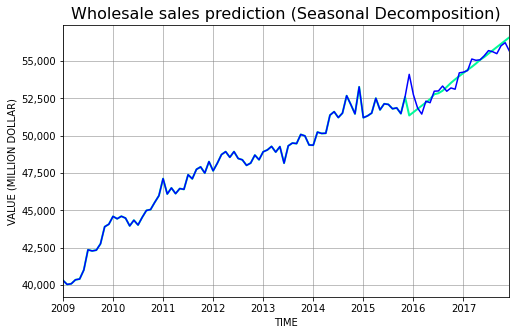

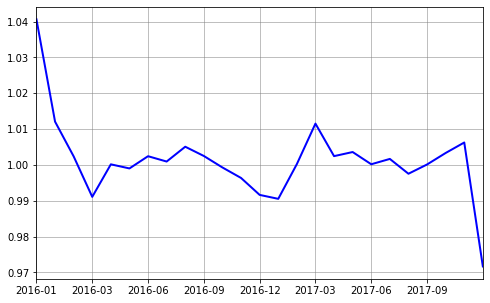

,North American Industry Classification System (NAICS),ARIMA_RMSE,ARIMA_MAPE,SARIMAX_RMSE,SARIMAX_MAPE,Seasonal Decompose_RMSE,Seasonal Decompose_MAPE
0,Total Wholesale Sales,604.863133,2.966778,604.373967,0.818043,682.808871,0.735513


In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from google.colab import  drive
drive.mount('/drive')
#df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

df_NAICS_All_T = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
#df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020')]
df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020') & (df_NAICS_All_T['YEAR'] != '2019') & (df_NAICS_All_T['YEAR'] != '2018')]
df_NAICS_All = pd.DataFrame(df_NAICS_All_T, columns = ['REF_DATE','VALUE'])

#df_NAICS_All

df_NAICS_All_P = pd.pivot_table(df_NAICS_All, values='REF_DATE', index='REF_DATE', aggfunc=np.sum)
df_NAICS_All_P['VALUE'] = df_NAICS_All_P['VALUE'].astype(float)

#df_NAICS_All_P

df_NAICS_All_P = df_NAICS_All_P.reset_index()
df_NAICS_All_P_N = df_NAICS_All_P['VALUE'].to_numpy()

df_NAICS_All_P_N.shape

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale_CV (df_NAICS_All_P_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale_CV (df_NAICS_All_P_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale_CV (df_NAICS_All_P_N, 0, 0, 12)
    
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_All_After_CV.csv')
df_Error_Table

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


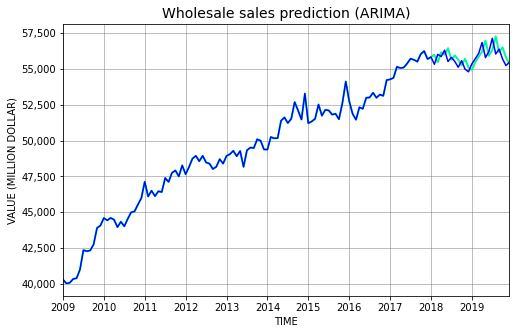

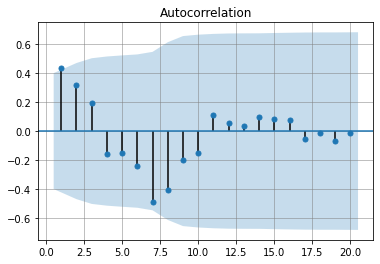

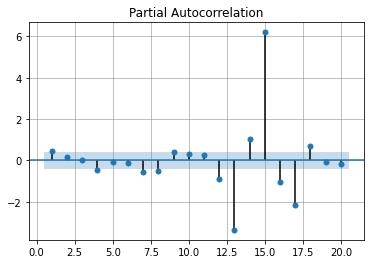

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1017.342
Method:                           css   S.D. of innovations            605.934
Date:                Wed, 29 Jul 2020   AIC                           2038.684
Time:                        04:54:21   BIC                           2044.419
Sample:                             1   HQIC                          2041.015
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.7308     53.144      2.159      0.033      10.571     218.891
                  0
count  1.300000e+02
mean   5.361100e-07
std    6.082779e+02
min   -2.181731e+03
25%   -4.059808e+02
50%    2.02

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


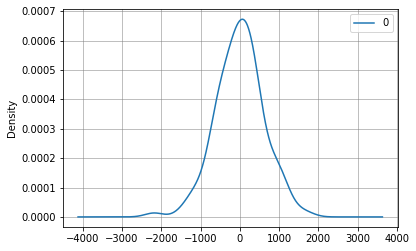

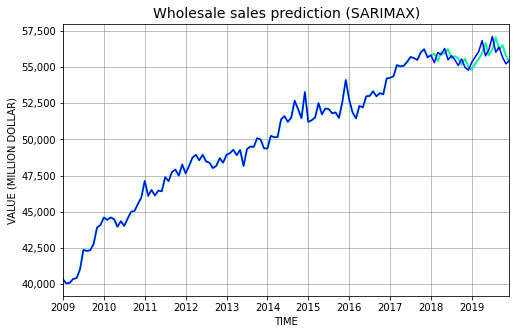

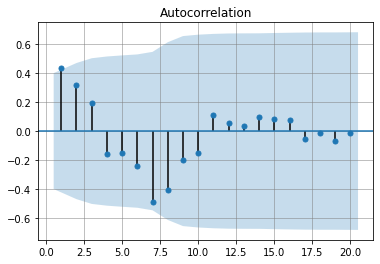

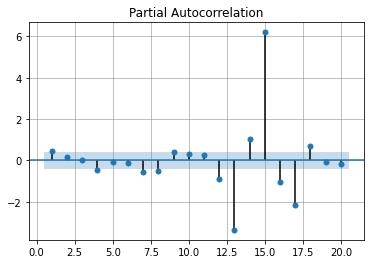

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(6, 1, 1)   Log Likelihood               -1011.890
Date:                Wed, 29 Jul 2020   AIC                           2039.779
Time:                        04:54:27   BIC                           2062.720
Sample:                             0   HQIC                          2049.101
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6178      0.192      3.223      0.001       0.242       0.993
ar.L2          0.0613      0.076      0.802      0.423      -0.089       0.211
ar.L3          0.0381      0.094      0.407      0.6

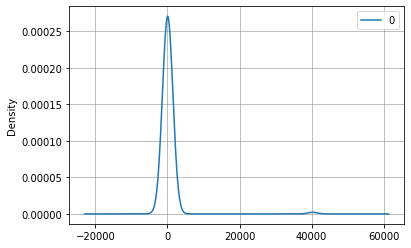

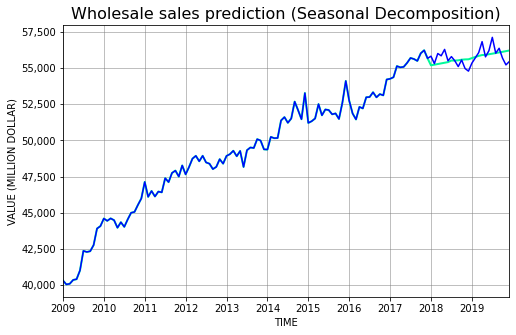

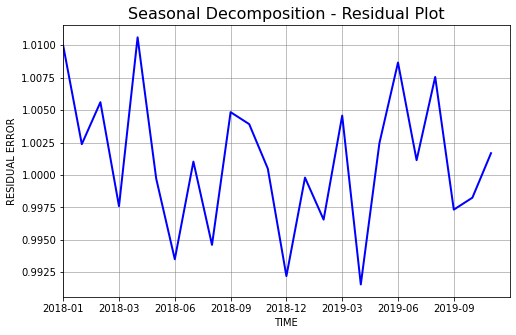

,North American Industry Classification System (NAICS),ARIMA_RMSE,ARIMA_MAPE,SARIMAX_RMSE,SARIMAX_MAPE,Seasonal Decompose_RMSE,Seasonal Decompose_MAPE
0,Total Wholesale Sales,591.147605,1.098857,564.137861,0.878346,560.982444,0.797567


In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from google.colab import  drive
drive.mount('/drive')
#df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
df_Error_Table = pd.DataFrame(columns=['North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])

df_NAICS_All_T = pd.DataFrame(NAICS_Wholesale_Data, columns = ['REF_DATE','North American Industry Classification System (NAICS)','VALUE','YEAR'])
df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020')]
#df_NAICS_All_T = df_NAICS_All_T.loc[(df_NAICS_All_T['YEAR'] != '2020') & (df_NAICS_All_T['YEAR'] != '2019') & (df_NAICS_All_T['YEAR'] != '2018')]
df_NAICS_All = pd.DataFrame(df_NAICS_All_T, columns = ['REF_DATE','VALUE'])

#df_NAICS_All

df_NAICS_All_P = pd.pivot_table(df_NAICS_All, values='REF_DATE', index='REF_DATE', aggfunc=np.sum)
df_NAICS_All_P['VALUE'] = df_NAICS_All_P['VALUE'].astype(float)

#df_NAICS_All_P

df_NAICS_All_P = df_NAICS_All_P.reset_index()
df_NAICS_All_P_N = df_NAICS_All_P['VALUE'].to_numpy()

df_NAICS_All_P_N.shape

A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale (df_NAICS_All_P_N, 0, 1, 0)
S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale (df_NAICS_All_P_N, 6, 1, 1)
SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale (df_NAICS_All_P_N, 0, 0, 12)
    
df_Error_Table = df_Error_Table.append({'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Wholesales_All_Test_Set.csv')
df_Error_Table

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


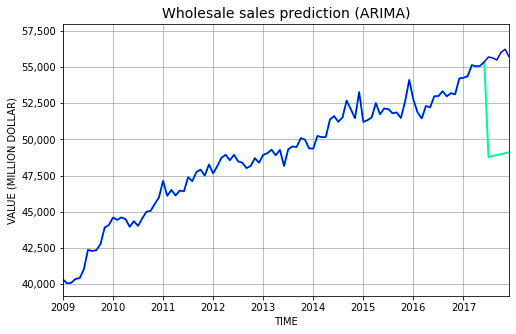

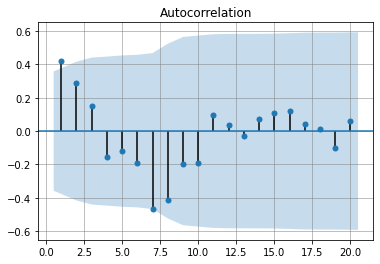

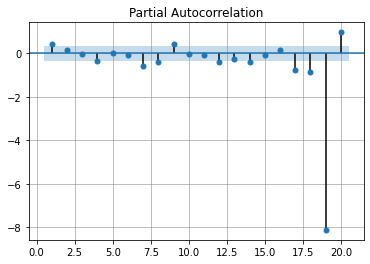

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(0, 0)   Log Likelihood               -1287.641
Method:                           css   S.D. of innovations           4493.481
Date:                Wed, 29 Jul 2020   AIC                           2579.282
Time:                        05:04:07   BIC                           2585.033
Sample:                             0   HQIC                          2581.619
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.033e+04    392.597    128.202      0.000    4.96e+04    5.11e+04
                  0
count  1.310000e+02
mean  -1.888416e-11
std    4.510731e+03
min   -1.029760e+04
25%   -2.759095e+03
50%    8.86

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


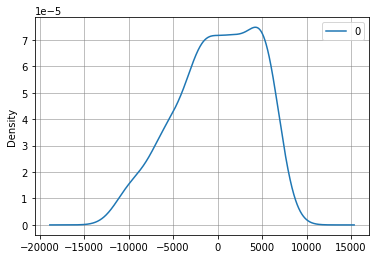

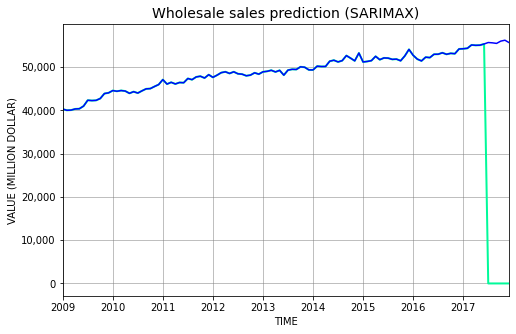

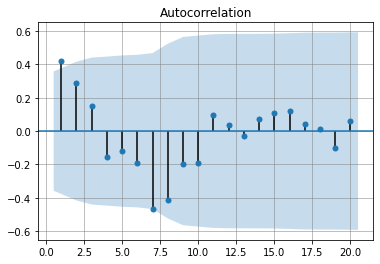

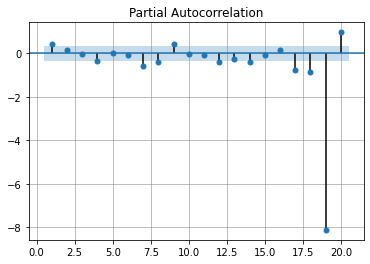

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:                        SARIMAX   Log Likelihood               -1604.658
Date:                Wed, 29 Jul 2020   AIC                           3211.316
Time:                        05:04:08   BIC                           3214.191
Sample:                             0   HQIC                          3212.484
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.553e+09   2.57e+09      0.994      0.320   -2.48e+09    7.59e+09
Ljung-Box (Q):                     1831.17   Jarque-Bera (JB):                 7.15
Prob(Q):                              0.00   Pr

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


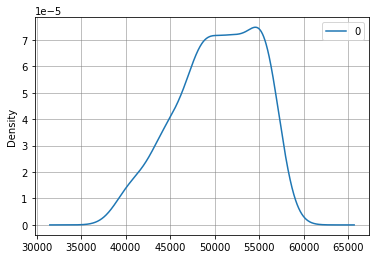

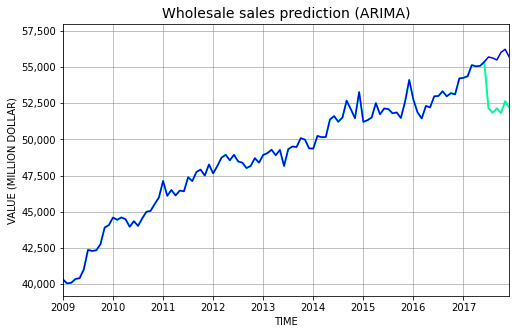

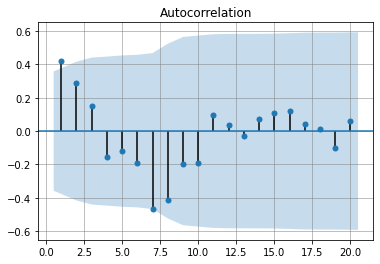

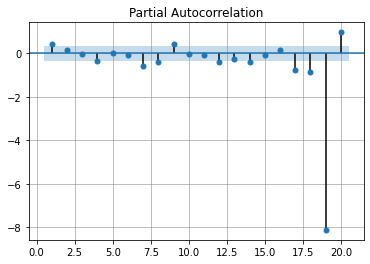

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(0, 1)   Log Likelihood               -1213.395
Method:                       css-mle   S.D. of innovations           2533.812
Date:                Wed, 29 Jul 2020   AIC                           2432.790
Time:                        05:04:11   BIC                           2441.416
Sample:                             0   HQIC                          2436.295
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.032e+04    417.868    120.420      0.000    4.95e+04    5.11e+04
ma.L1.y        0.8943      0.031     28.442      0.000       0.833       0.956
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


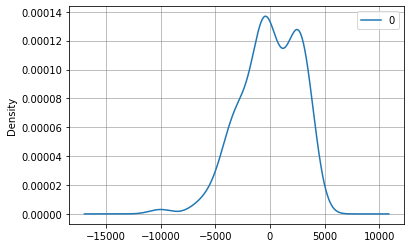

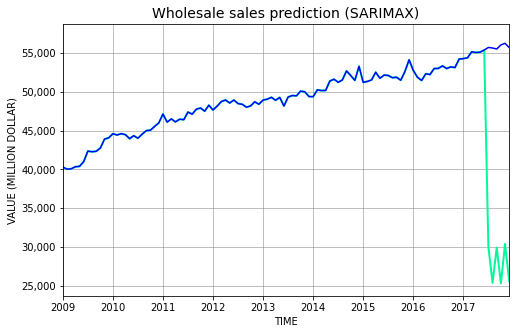

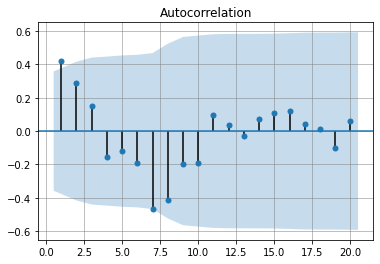

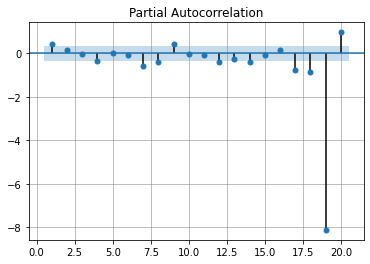

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1516.984
Date:                Wed, 29 Jul 2020   AIC                           3037.968
Time:                        05:04:14   BIC                           3043.718
Sample:                             0   HQIC                          3040.304
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000      0.836      1.196      0.232      -0.638       2.638
sigma2      6.583e+08   1.27e-09   5.18e+17      0.000    6.58e+08    6.58e+08
Ljung-Box (Q):                      858.34   Jarque-

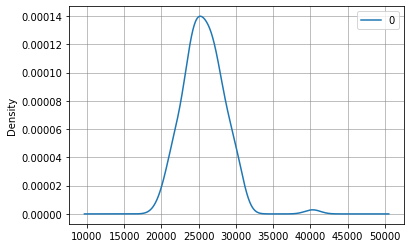

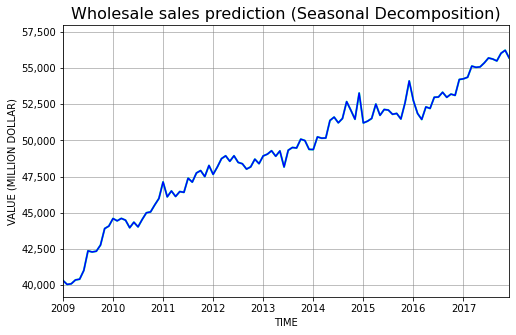

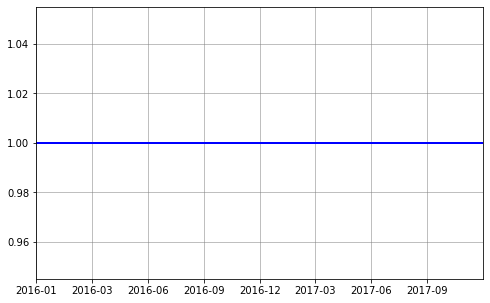

0 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


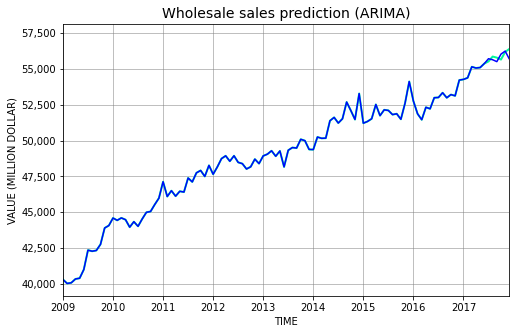

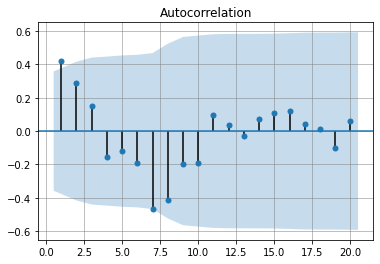

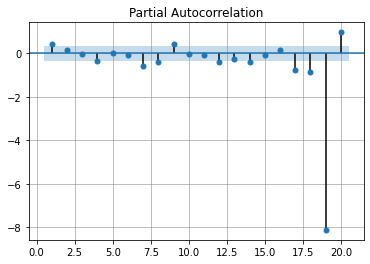

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1017.342
Method:                           css   S.D. of innovations            605.934
Date:                Wed, 29 Jul 2020   AIC                           2038.684
Time:                        05:04:18   BIC                           2044.419
Sample:                             1   HQIC                          2041.015
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.7308     53.144      2.159      0.033      10.571     218.891
                  0
count  1.300000e+02
mean   5.361100e-07
std    6.082779e+02
min   -2.181731e+03
25%   -4.059808e+02
50%    2.02

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


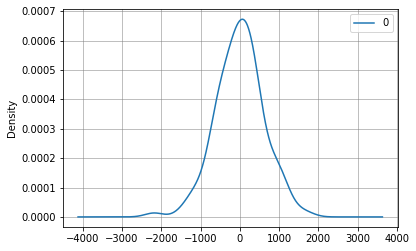

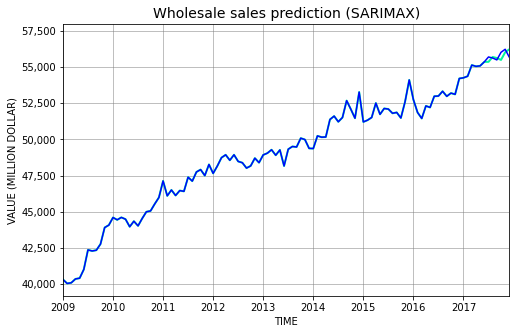

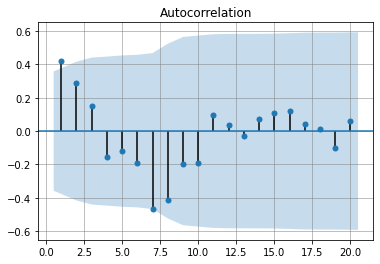

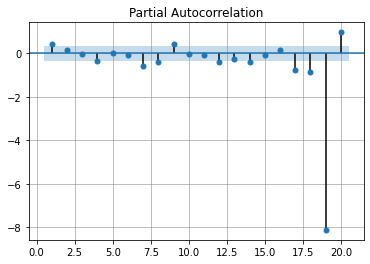

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1019.632
Date:                Wed, 29 Jul 2020   AIC                           2041.265
Time:                        05:04:19   BIC                           2044.132
Sample:                             0   HQIC                          2042.430
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.786e+05   4.07e+04      9.305      0.000    2.99e+05    4.58e+05
Ljung-Box (Q):                       33.30   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.76   Pr

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


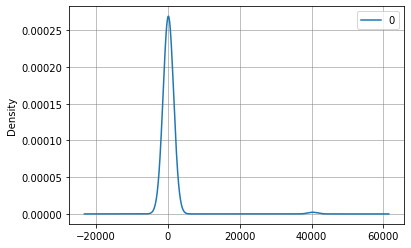

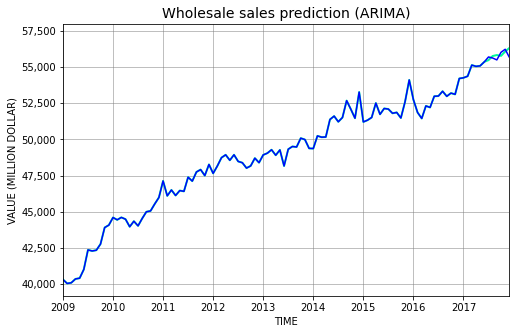

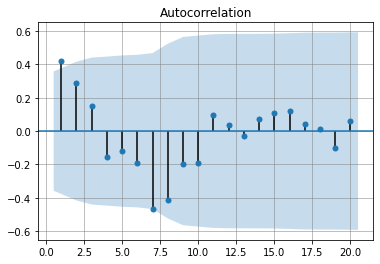

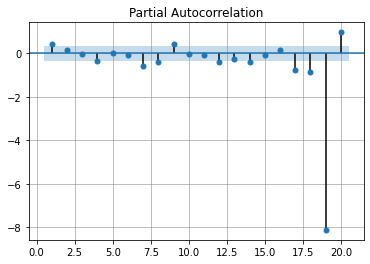

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1009.954
Method:                       css-mle   S.D. of innovations            572.151
Date:                Wed, 29 Jul 2020   AIC                           2025.908
Time:                        05:04:21   BIC                           2034.511
Sample:                             1   HQIC                          2029.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.2637     32.235      3.669      0.000      55.084     181.444
ma.L1.D.y     -0.3607      0.086     -4.176      0.000      -0.530      -0.191
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


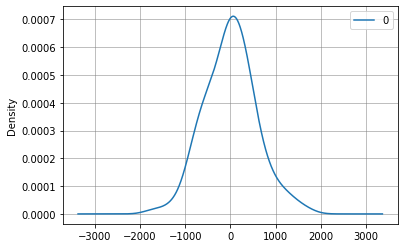

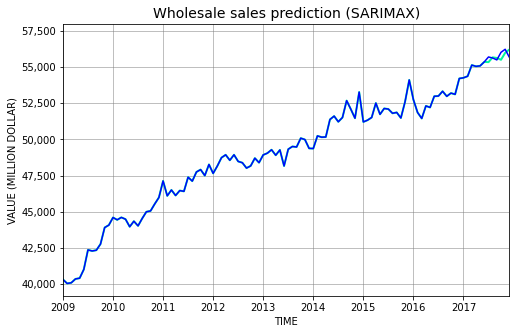

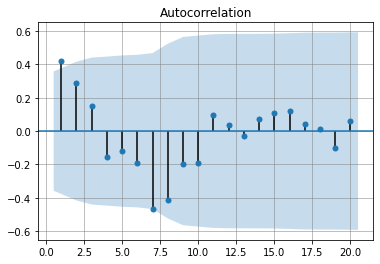

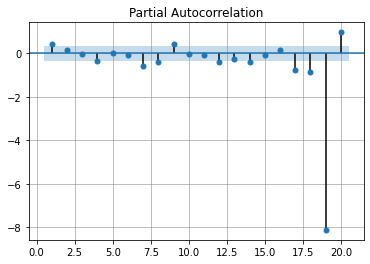

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1017.723
Date:                Wed, 29 Jul 2020   AIC                           2039.447
Time:                        05:04:23   BIC                           2045.182
Sample:                             0   HQIC                          2041.777
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0930      0.040     -2.296      0.022      -0.172      -0.014
sigma2      3.654e+05   4.18e+04      8.750      0.000    2.84e+05    4.47e+05
Ljung-Box (Q):                       26.92   Jarque-

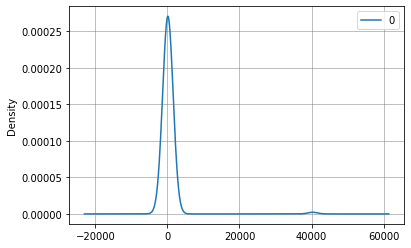

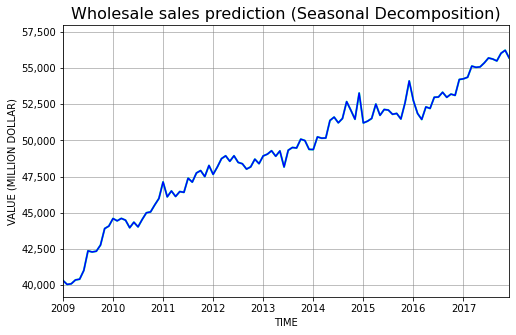

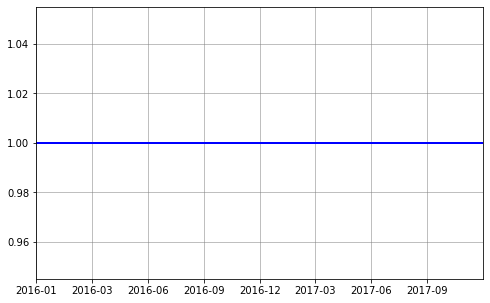

0 1 1


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


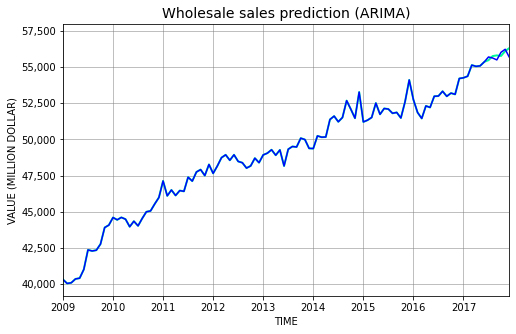

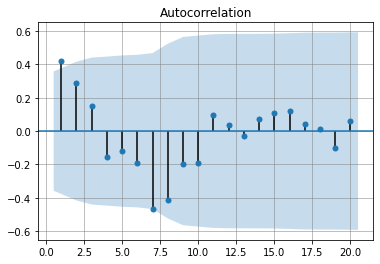

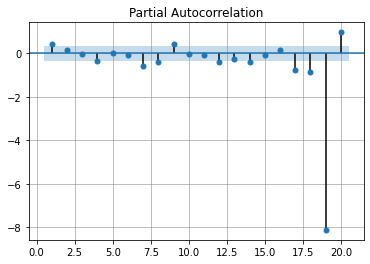

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1009.889
Method:                       css-mle   S.D. of innovations            571.857
Date:                Wed, 29 Jul 2020   AIC                           2027.779
Time:                        05:04:25   BIC                           2039.249
Sample:                             1   HQIC                          2032.439
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.6685     31.089      3.817      0.000      57.735     179.602
ma.L1.D.y     -0.3504      0.089     -3.954      0.000      -0.524      -0.177
ma.L2.D.y     -0.0337      0.093     -0.362      0.7

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


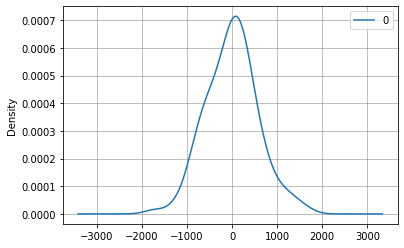

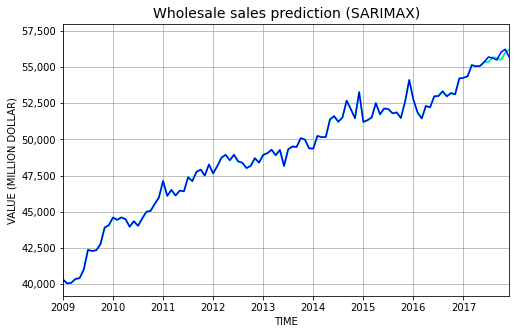

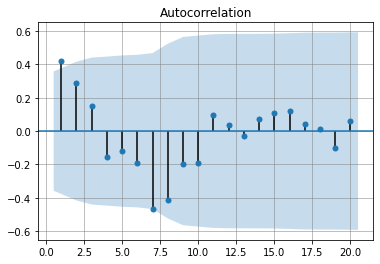

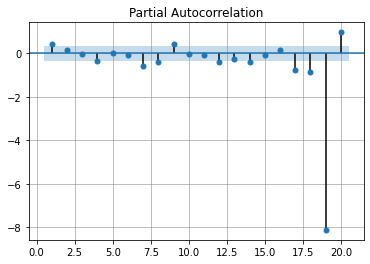

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1017.712
Date:                Wed, 29 Jul 2020   AIC                           2041.424
Time:                        05:04:27   BIC                           2050.027
Sample:                             0   HQIC                          2044.920
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0961      0.040     -2.394      0.017      -0.175      -0.017
ma.L2          0.0085      0.089      0.095      0.925      -0.167       0.184
sigma2      3.543e+05   3.96e+04      8.945      0.0

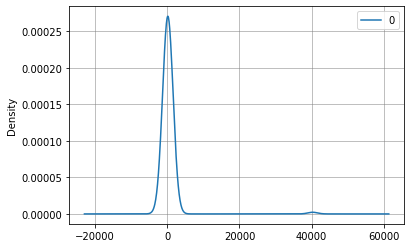

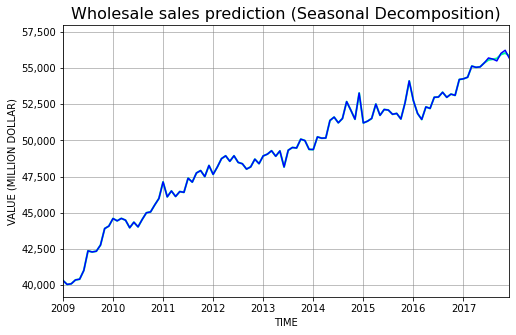

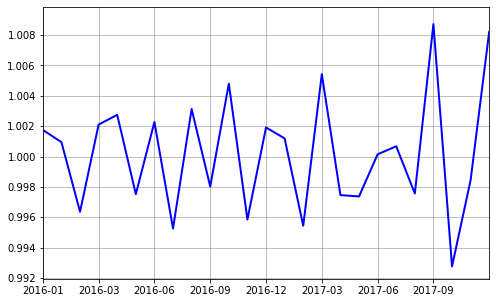

0 1 2


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


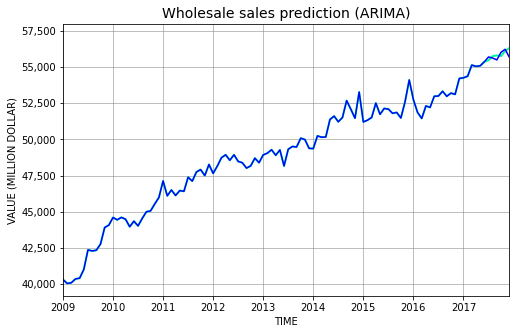

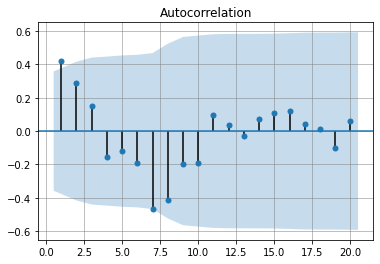

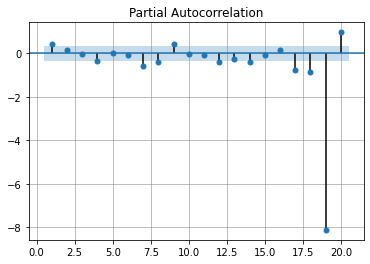

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  130
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1009.888
Method:                       css-mle   S.D. of innovations            571.854
Date:                Wed, 29 Jul 2020   AIC                           2029.777
Time:                        05:04:31   BIC                           2044.114
Sample:                             1   HQIC                          2035.603
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.6358     31.225      3.799      0.000      57.436     179.836
ma.L1.D.y     -0.3502      0.088     -3.958      0.000      -0.524      -0.177
ma.L2.D.y     -0.0346      0.095     -0.363      0.7

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


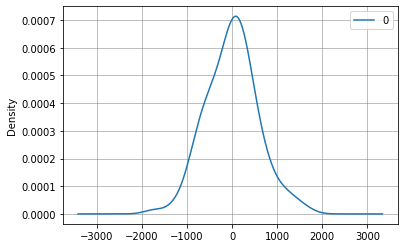

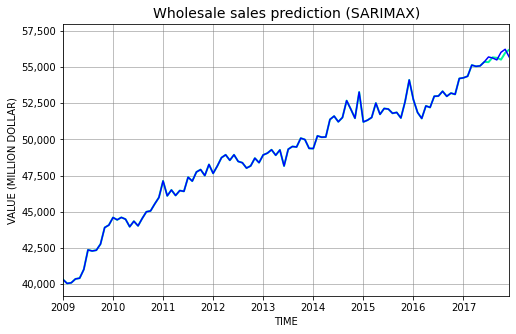

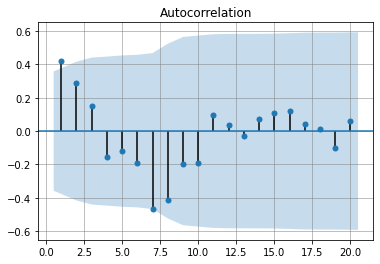

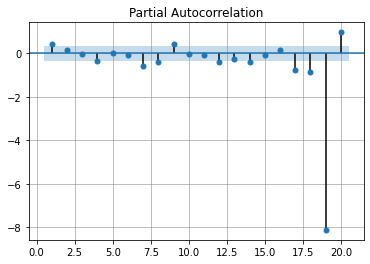

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1017.435
Date:                Wed, 29 Jul 2020   AIC                           2042.871
Time:                        05:04:33   BIC                           2054.341
Sample:                             0   HQIC                          2047.531
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1007      0.039     -2.595      0.009      -0.177      -0.025
ma.L2          0.0067      0.085      0.079      0.937      -0.159       0.173
ma.L3          0.0347      0.077      0.450      0.6

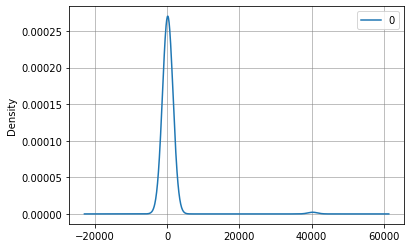

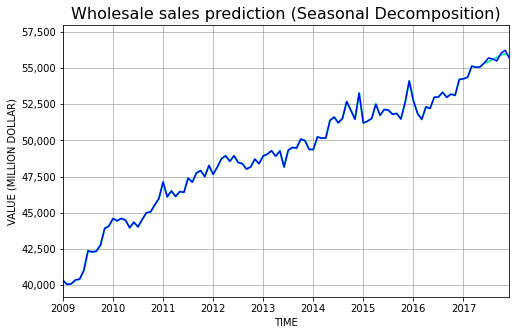

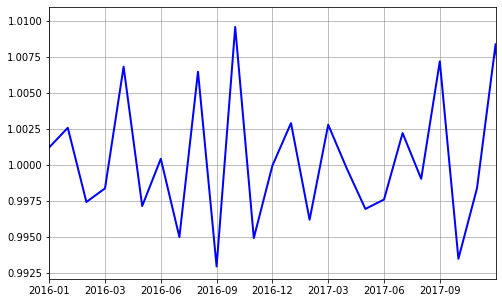

0 1 3


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


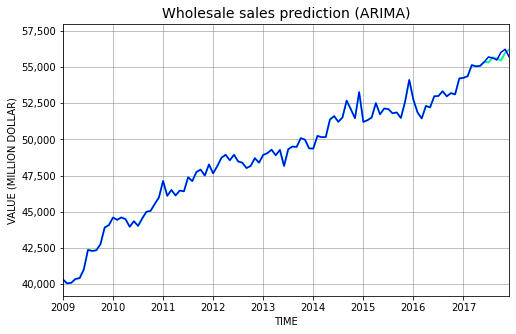

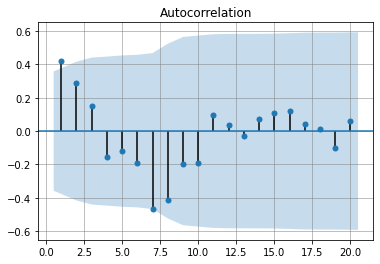

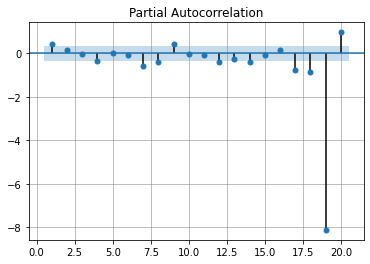

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(1, 0)   Log Likelihood               -1029.781
Method:                       css-mle   S.D. of innovations            616.345
Date:                Wed, 29 Jul 2020   AIC                           2065.563
Time:                        05:04:36   BIC                           2074.188
Sample:                             0   HQIC                          2069.068
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.832e+04   5926.081      8.154      0.000    3.67e+04    5.99e+04
ar.L1.y        0.9957      0.005    185.883      0.000       0.985       1.006
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


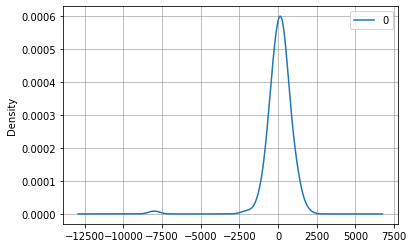

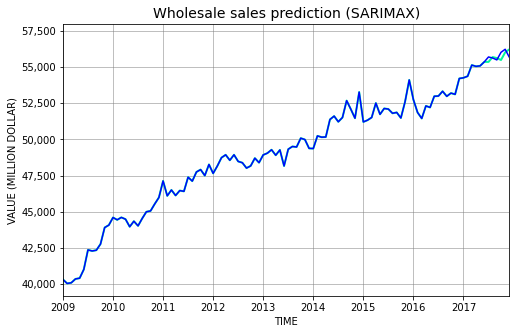

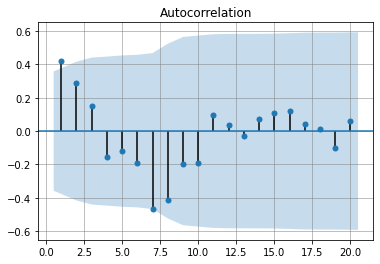

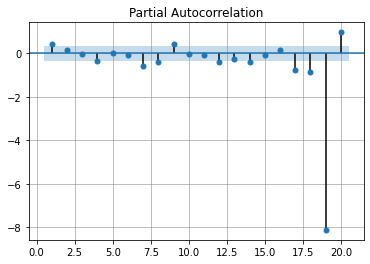

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1031.837
Date:                Wed, 29 Jul 2020   AIC                           2067.673
Time:                        05:04:38   BIC                           2073.424
Sample:                             0   HQIC                          2070.010
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1647.323      0.000       0.999       1.001
sigma2      3.808e+05   5.95e-13    6.4e+17      0.000    3.81e+05    3.81e+05
Ljung-Box (Q):                       33.27   Jarque-

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/seasonal.py:133: RuntimeWarning: divide by zero encountered in true_divide
  filt = np.array([.5] + [1] * (freq - 1) + [.5]) / freq
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


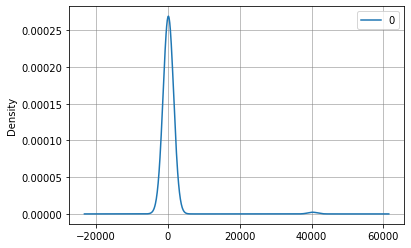

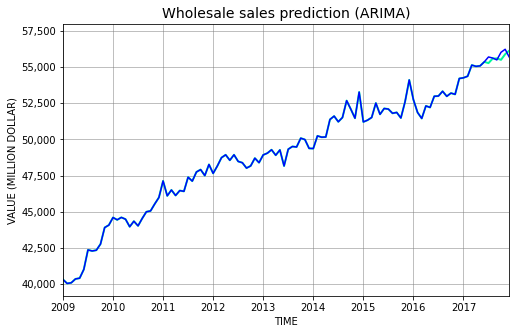

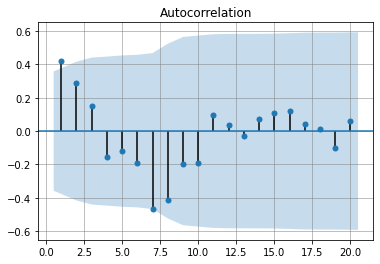

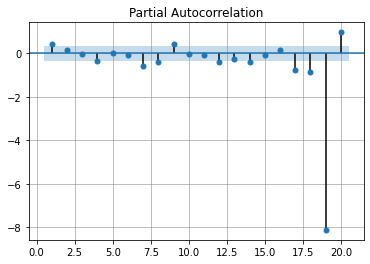

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(1, 1)   Log Likelihood               -1025.564
Method:                       css-mle   S.D. of innovations            596.230
Date:                Wed, 29 Jul 2020   AIC                           2059.129
Time:                        05:04:43   BIC                           2070.630
Sample:                             0   HQIC                          2063.802
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.826e+04   6695.740      7.208      0.000    3.51e+04    6.14e+04
ar.L1.y        0.9980      0.003    368.063      0.000       0.993       1.003
ma.L1.y       -0.2482      0.080     -3.114      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


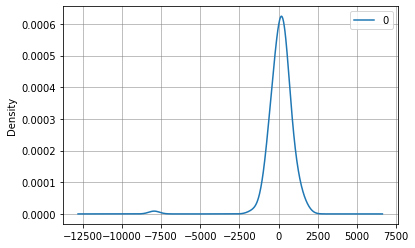

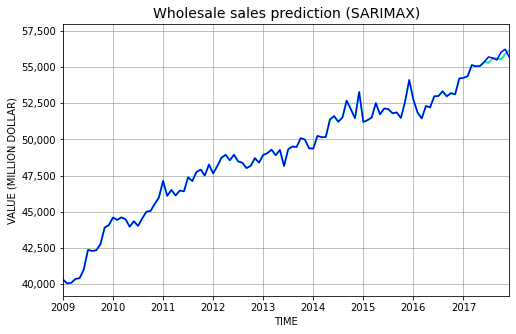

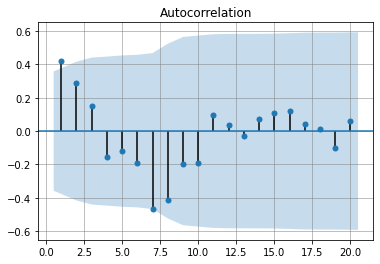

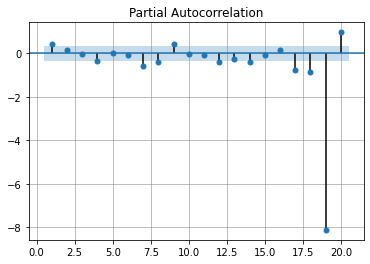

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1027.511
Date:                Wed, 29 Jul 2020   AIC                           2061.022
Time:                        05:04:47   BIC                           2069.648
Sample:                             0   HQIC                          2064.527
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3771.766      0.000       0.999       1.000
ma.L1         -0.2503      0.072     -3.479      0.001      -0.391      -0.109
sigma2      3.556e+05   8.47e-09    4.2e+13      0.0

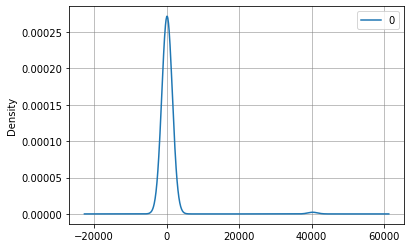

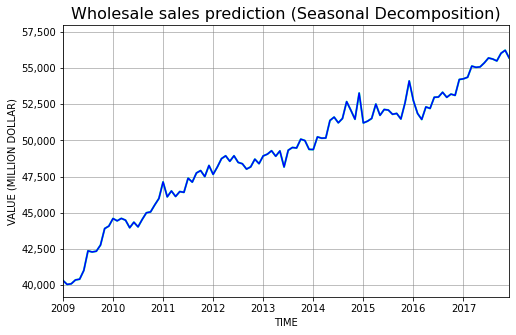

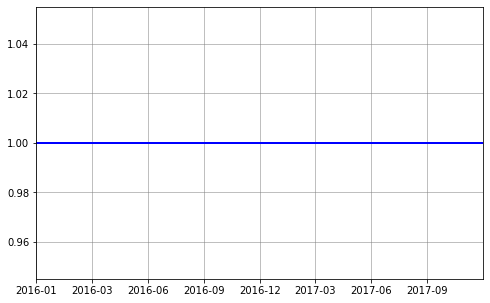

1 0 1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


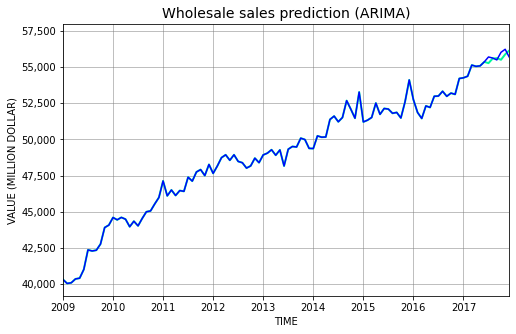

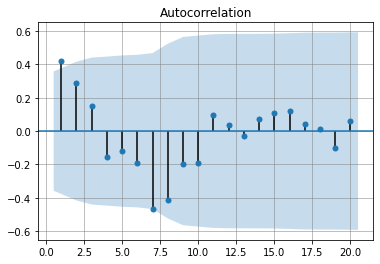

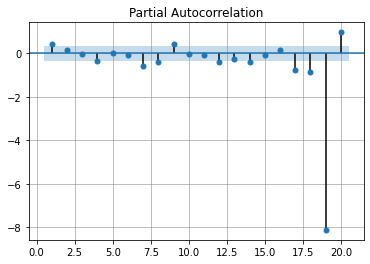

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(1, 2)   Log Likelihood               -1025.383
Method:                       css-mle   S.D. of innovations            595.412
Date:                Wed, 29 Jul 2020   AIC                           2060.767
Time:                        05:04:55   BIC                           2075.143
Sample:                             0   HQIC                          2066.609
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.81e+04   6619.157      7.266      0.000    3.51e+04    6.11e+04
ar.L1.y        0.9978      0.003    334.286      0.000       0.992       1.004
ma.L1.y       -0.2703      0.091     -2.956      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

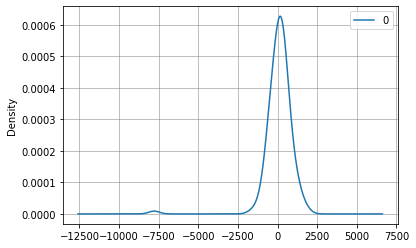

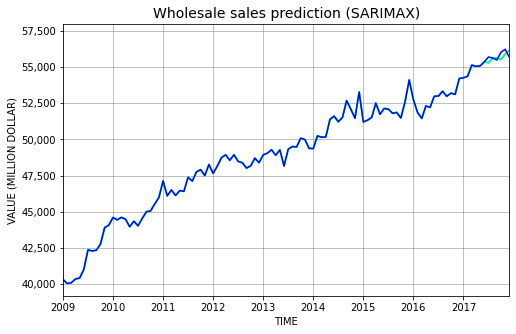

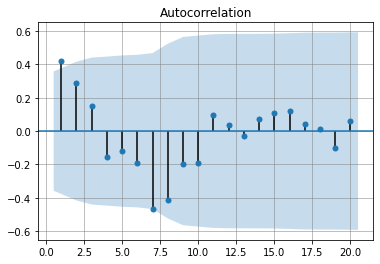

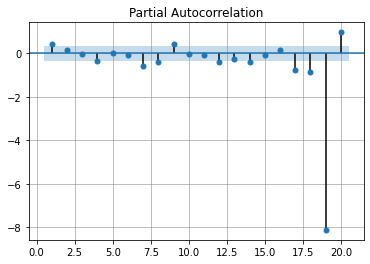

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1027.341
Date:                Wed, 29 Jul 2020   AIC                           2062.682
Time:                        05:05:01   BIC                           2074.183
Sample:                             0   HQIC                          2067.356
                                - 131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3483.566      0.000       0.999       1.001
ma.L1         -0.2719      0.072     -3.783      0.000      -0.413      -0.131
ma.L2          0.0521      0.082      0.639      0.5

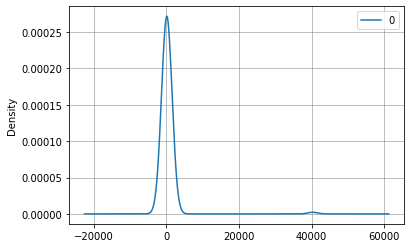

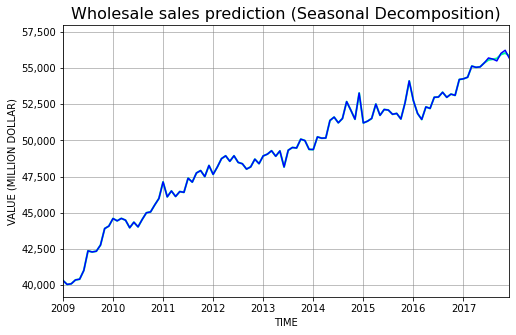

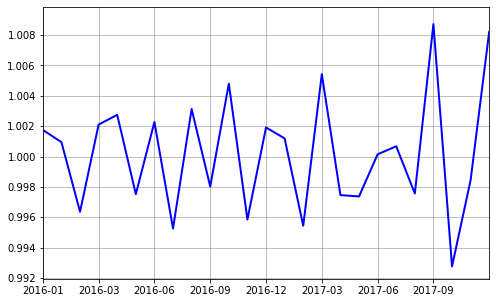

1 0 2


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


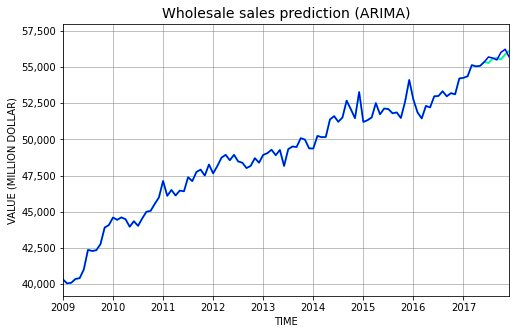

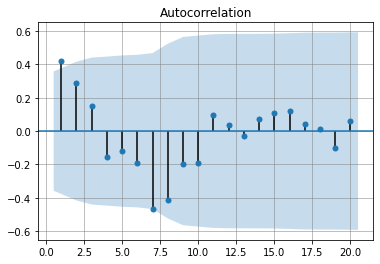

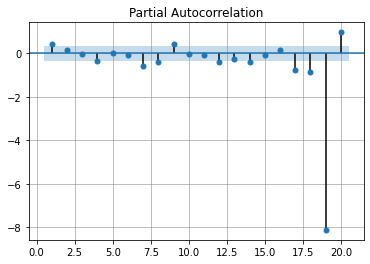

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(1, 3)   Log Likelihood               -1024.985
Method:                       css-mle   S.D. of innovations            593.612
Date:                Wed, 29 Jul 2020   AIC                           2061.970
Time:                        05:05:11   BIC                           2079.221
Sample:                             0   HQIC                          2068.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.803e+04   6495.179      7.395      0.000    3.53e+04    6.08e+04
ar.L1.y        0.9975      0.003    289.839      0.000       0.991       1.004
ma.L1.y       -0.2670      0.088     -3.042      0.0

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import  drive
drive.mount('/drive')
df_Error_Table = pd.DataFrame(columns=['P','D','Q','North American Industry Classification System (NAICS)', 'ARIMA_RMSE', 'ARIMA_MAPE','SARIMAX_RMSE','SARIMAX_MAPE','Seasonal Decompose_RMSE','Seasonal Decompose_MAPE'])
A_RMSE = 0
A_MAPE = 0
S_RMSE = 0
S_MAPE = 0
SD_RMSE = 0
SD_MAPE = 0

for a in range (0, 13):
  for b in range (0, 2):
    for c in range (0, 4):
      try:
        A_RMSE, A_MAE, A_MAPE = ARIMA_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        S_RMSE, S_MAE, S_MAPE = SARIMAX_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        SD_RMSE, SD_MAE, SD_MAPE = SD_Wholesale_CV (df_NAICS_All_P_N, a, b, c)
        print (a, b, c)
      except:
        pass
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE, 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'ARIMA_RMSE':A_RMSE, 'ARIMA_MAPE':A_MAPE, 'SARIMAX_RMSE':S_RMSE, 'SARIMAX_MAPE':S_MAPE}, ignore_index = True)
      df_Error_Table = df_Error_Table.append({'P':a, 'D':b, 'Q':c, 'North American Industry Classification System (NAICS)':'Total Wholesale Sales', 'Seasonal Decompose_RMSE':SD_RMSE, 'Seasonal Decompose_MAPE':SD_MAPE}, ignore_index = True)
      df_Error_Table.to_csv('/drive/My Drive/RU Data Science/Major Research Project/Python Code/ARIMA_Test/df_Error_Table_Cross_Validation.csv')
df_Error_Table